<a href="https://colab.research.google.com/github/ShubhamShaswat/Emotion_Detection/blob/master/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tqdm import tqdm
import cv2
import PIL
import requests

#import face_recognition
import json
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



In [0]:
#implement ana age estimation model usin transfer learnin

img_width=48
img_height=48



#load vgg16 model from keras
from keras.applications.vgg16 import VGG16

model=VGG16(weights='imagenet', include_top=False,input_shape=(img_width, img_height, 3))


In [0]:
#freeze the layer
for layer in model.layers:
  layer.trainable=False
  
  

In [0]:
#add final fully connected layers

from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout



def myModel():
  
  X=model.output
  X=Flatten()(X)
  X=Dense(512,activation='relu')(X)
  X=Dense(4,activation='softmax')(X)
  
  
  return Model(input=model.input,output=X)
  

In [0]:
#define a callbacks



In [78]:
#UPLOAD ALL NECESSERY FILES

files.upload()

Saving sad1.jpg to sad1.jpg


{'sad1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc2\x00\x11\x08\x03W\x02:\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x02\x03\x05\x06\x01\x07\x08\t\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfa\x81\x94!\x08B\x10\x95"T\x89R!*D!\x

In [0]:
#read csv file

train_data=pd.read_csv('face_dataset.csv')
train_data['id']=train_data['id'].astype(np.unicode_)
train_data['emotion'] = train_data['emotion'].astype(np.unicode_)

In [0]:
train_data['id']+='.jpg'


In [0]:
#unzip crop_images
!unzip crop_images 

import os
len(os.listdir('crop_images'))

In [0]:
!rm -r *.zip

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.0,
                                rotation_range=30,
                                shear_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True
                                )
                                

train_data=train_datagen.flow_from_dataframe(train_data,directory='crop_images', x_col='id', y_col='emotion', target_size=(48, 48),  class_mode='categorical')


  

Found 82 validated image filenames belonging to 4 classes.


In [66]:
train_data.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

In [60]:
my_model=myModel()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
from keras.optimizers import RMSprop

my_model.compile(optimizer=RMSprop(lr=0.001),loss= "categorical_crossentropy", metrics=["accuracy"])

In [62]:
history=my_model.fit_generator(train_data, steps_per_epoch=train_data.samples//32,epochs=100,callbacks=[])


Epoch 1/100
2/2 [==============================] - 1s 328ms/step - loss: 1.2985 - acc: 0.3894
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 1.8164 - acc: 0.4308
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.9560 - acc: 0.5938
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7660 - acc: 0.6286
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 0.9974 - acc: 0.5845
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 0.7841 - acc: 0.6875
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.8464 - acc: 0.6448
Epoch 8/100
2/2 [==============================] - 0s 53ms/step - loss: 0.7856 - acc: 0.6610
Epoch 9/100
2/2 [==============================] - 0s 71ms/step - loss: 0.8129 - acc: 0.6875
Epoch 10/100
2/2 [==============================] - 0s 61ms/step - loss: 0.8461 - acc: 0.6259
Epoch 11/100
2/2 [==============================] - 0s 48ms/step - l

[[0. 1. 0. 0.]]


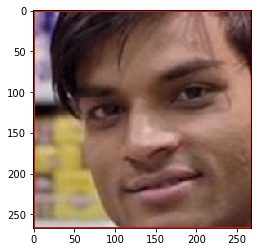

In [81]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

image_name='crop_images/565c1.jpg'
# load an image from file
image = load_img(image_name, target_size=(48, 48))


# convert the image pixels to a numpy array
image = img_to_array(image)
#reshape image
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#preprocess input image
image = preprocess_input(image)

print(my_model.predict(image))


plt.imshow(Image.open(image_name))